In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
dataset_dir = "./dataset/preprocessed_dataset/"
with open(dataset_dir+"1_108_1x4_dataset_3D_win_10_normalize_False_overlap_True.pkl", "rb") as fp:
    dataset = pickle.load(fp)
with open(dataset_dir+"1_108_1x4_label_3D_win_10_normalize_False_overlap_True.pkl", "rb") as fp:
    labels = pickle.load(fp)
height = dataset.shape[2]
width = dataset.shape[3]
window_size = dataset.shape[1]
print("Dataset shape:", dataset.shape)
print("Labels shape:", labels.shape)

Dataset shape: (618414, 10, 1, 4)
Labels shape: (618414,)


Regularize first block for confirmation.
[ 34.  53.  51.  22.  27.  52.  48.  29.  36.  44.  44.  40.  55.  52.
  37.  46.  39.  43.  15.  44.  33.  23.  -2.  51.  32.   7.   8.  38.
  32.   7.   4.  33.   3. -12.  16.  31. -21. -35.   9.  22.]
First block mean:
27.25
First block std:
21.225868651247232
First block after normalization:
[ 0.31800819  1.21314234  1.11891769 -0.2473397  -0.01177808  1.16603002
  0.97758072  0.08244657  0.41223283  0.78913143  0.78913143  0.60068213
  1.30736699  1.16603002  0.45934516  0.88335607  0.55356981  0.7420191
 -0.57712597  0.78913143  0.27089586 -0.20022738 -1.37803548  1.11891769
  0.22378354 -0.95402456 -0.90691224  0.50645748  0.22378354 -0.95402456
 -1.09536153  0.27089586 -1.14247386 -1.84915872 -0.53001364  0.17667121
 -2.27316963 -2.93274217 -0.85979991 -0.2473397 ]


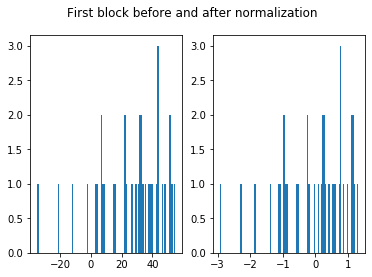

In [3]:
print("Regularize first block for confirmation.")
data = dataset[0].ravel()
print(data)
print("First block mean:")
mean = data.mean()
print(mean)
print("First block std:")
std = data.std()
print(std)
print("First block after normalization:")
data_norm = (data - mean) / std
print(data_norm)
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.suptitle("First block before and after normalization")
ax1.hist(data, bins=100)
ax2.hist(data_norm, bins=100)
plt.show()

Regularize first block for confirmation.
First block after normalization:
[[ 0.31800819]
 [ 1.21314234]
 [ 1.11891769]
 [-0.2473397 ]
 [-0.01177808]
 [ 1.16603002]
 [ 0.97758072]
 [ 0.08244657]
 [ 0.41223283]
 [ 0.78913143]
 [ 0.78913143]
 [ 0.60068213]
 [ 1.30736699]
 [ 1.16603002]
 [ 0.45934516]
 [ 0.88335607]
 [ 0.55356981]
 [ 0.7420191 ]
 [-0.57712597]
 [ 0.78913143]
 [ 0.27089586]
 [-0.20022738]
 [-1.37803548]
 [ 1.11891769]
 [ 0.22378354]
 [-0.95402456]
 [-0.90691224]
 [ 0.50645748]
 [ 0.22378354]
 [-0.95402456]
 [-1.09536153]
 [ 0.27089586]
 [-1.14247386]
 [-1.84915872]
 [-0.53001364]
 [ 0.17667121]
 [-2.27316963]
 [-2.93274217]
 [-0.85979991]
 [-0.2473397 ]]


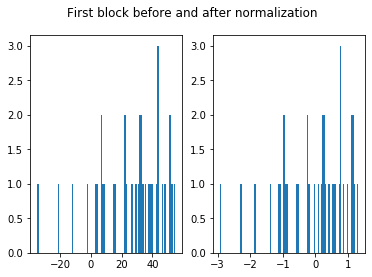

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print("Regularize first block for confirmation.")
data = dataset[0].reshape(-1, 1)
print("First block after normalization:")
data_norm_2 = scaler.fit_transform(data)
print(data_norm_2)
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.suptitle("First block before and after normalization")
ax1.hist(data, bins=100)
ax2.hist(data_norm_2, bins=100)
plt.show()

In [5]:
(data_norm - data_norm_2).mean()

0.0

In [52]:
dataset_mean = dataset.mean(axis=(1, 2, 3)).reshape(-1, 1, 1, 1)
print("Dataset mean shape:")
print(dataset_mean.shape)
dataset_std = dataset.std(axis=(1, 2, 3)).reshape(-1, 1, 1, 1)
print("Dataset std shape:")
print(dataset_std.shape)
dataset_norm = (dataset - dataset_mean) / (dataset_std + 1e-9)
data_norm_3 = dataset_norm[0]

Dataset mean shape:
(618414, 1, 1, 1)
Dataset std shape:
(618414, 1, 1, 1)


In [28]:
dataset.reshape(-1, 40).transpose().shape

(40, 618414)

In [41]:
dataset_norm_2 = scaler.fit_transform(dataset.reshape(-1, 40).transpose())
dataset_norm_2 = dataset_norm_2.transpose().reshape(-1, 10, 1, 4)

In [44]:
dataset_norm_2.shape

(618414, 10, 1, 4)

In [45]:
scaler.mean_.shape

(618414,)

In [55]:
(dataset_norm - dataset_norm_2).sum()

1.9247723261148902e-13

In [59]:
0.23 / 1e-9

230000000.0